## Amazon Product Database Analysis

## Data Read

In [1]:
import os
for dirname, _, filenames in os.walk('amazon_products/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

amazon_products/amazon_products.csv
amazon_products/amazon_categories.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
products_df = pd.read_csv('amazon_products.csv')
categories_df = pd.read_csv('amazon_categories.csv')

In [6]:
df = pd.merge(products_df , categories_df , left_on='category_id', right_on='id' , how="inner")

In [7]:
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases


In [8]:
df.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth', 'id',
       'category_name'],
      dtype='object')

In [9]:
df.shape

(1426337, 13)

In [10]:
df.dtypes

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
id                     int64
category_name         object
dtype: object

## Data Cleaning and Preparation

In [11]:
df.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
id                   0
category_name        0
dtype: int64

In [12]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df = df.fillna(0)

In [13]:
df.isnull().sum().sum()

0

In [14]:
# Condition where listPrice is 0
condition1 = df['listPrice'] == 0

# Drop rows where condition is True
df = df.drop(df[condition1].index)

# Condition where price is 0
condition2 = df['price'] == 0

# Drop rows where condition is True
df = df.drop(df[condition2].index)

In [15]:
df.isnull().any()

asin                 False
title                False
imgUrl               False
productURL           False
stars                False
reviews              False
price                False
listPrice            False
category_id          False
isBestSeller         False
boughtInLastMonth    False
id                   False
category_name        False
dtype: bool

## Feature Engineering

In [16]:
# Remove items with zero prices
df = df[df['price']>0]

# Calculate discount percentage
def calculate_discount_percentage(x):
    if x['listPrice'] == 0:
        return 0
    return 100*(1-x['price']/x['listPrice'])
df['discount_percentage'] = df[['price', 'listPrice']].apply(calculate_discount_percentage, axis=1)

# remove negative discounts
df = df[df['discount_percentage']>=0]
df['discount_percentage'].fillna(0, inplace=True)  # Replace NaN values with 0
df['discount_percentage'] = df['discount_percentage'].replace([float('inf'), -float('inf')], 0)  # Handle infinite values

<ipython-input-16-656e94fa283e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_percentage'].fillna(0, inplace=True)  # Replace NaN values with 0
<ipython-input-16-656e94fa283e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_percentage'] = df['discount_percentage'].replace([float('inf'), -float('inf')], 0)  # Handle infinite values


In [17]:
#Creating Categories for Rankings

rating_score = []

for score in df['stars']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [18]:
df['rating_score'] = rating_score

df['rating_score'] = df['rating_score'].astype('category')

<ipython-input-18-e7a25148f219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_score'] = rating_score


In [19]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df['difference_price'] = df['listPrice'] - df['price']

In [20]:
df1 = df[['asin','title', 'category_name', 'listPrice', 'price', 'difference_price', 'discount_percentage', 'stars', 'rating_score', 'boughtInLastMonth']].copy()

In [21]:
df1

,asin,title,category_name,listPrice,price,difference_price,discount_percentage,stars,rating_score,boughtInLastMonth
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,Suitcases,209.99,169.99,40.00,19.048526,4.5,Above Average,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,Suitcases,429.99,365.49,64.50,15.000349,4.6,Above Average,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,Suitcases,354.37,291.59,62.78,17.715947,4.6,Above Average,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,Suitcases,309.99,174.99,135.00,43.549792,4.5,Above Average,400
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,Suitcases,137.04,112.63,24.41,17.812318,4.5,Above Average,500
...,...,...,...,...,...,...,...,...,...,...
1426295,B00XUPP4TY,"USA Spec BT45-INFI Bluetooth Phone, Music & AU...",Car Electronics & Accessories,185.91,169.95,15.96,8.584799,4.5,Above Average,0
1426307,B0010GB02A,GM Genuine Parts 15874123 Radio Antenna Base A...,Car Electronics & Accessories,37.50,26.48,11.02,29.386667,4.9,Above Average,0
1426311,B0855GVTX7,Scosche BLPE-SP 30W Dual USB Port Power Endcap...,Car Electronics & Accessories,29.99,24.99,5.00,16.672224,4.1,Above Average,0
1426326,B09S69GRN4,X AUTOHAUX 315MHz LHJ011 Replacement Keyless E...,Car Electronics & Accessories,9.99,9.49,0.50,5.005005,3.5,Average,0


## Exploratory Data Analysis(EDA)

In [22]:
#Setting Visualization Style

sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

## Product Category

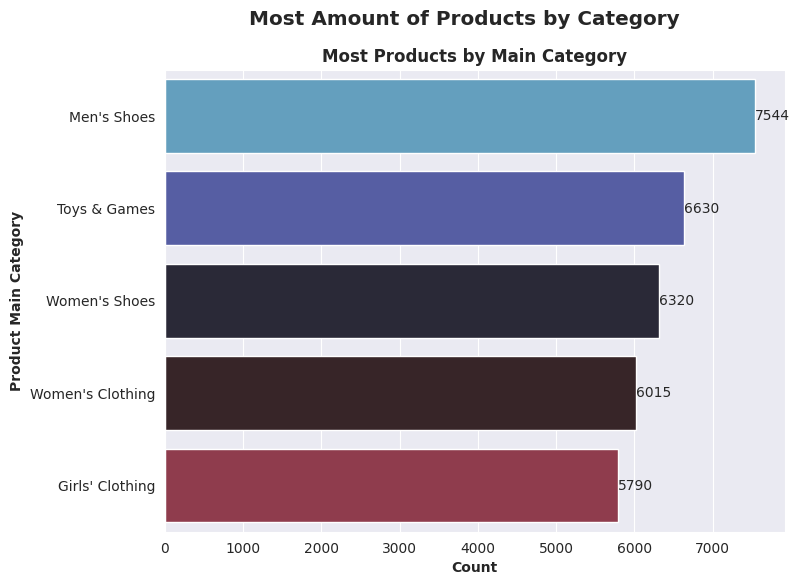

In [23]:
#Most amount of products by category

most_main_items = df1['category_name'].value_counts().head(5).rename_axis('category_name').reset_index(name='counts')

fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=most_main_items, x='counts', y='category_name')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')

ax.set_title('Most Products by Main Category', fontweight='bold')

ax.bar_label(ax.containers[0])

plt.show()


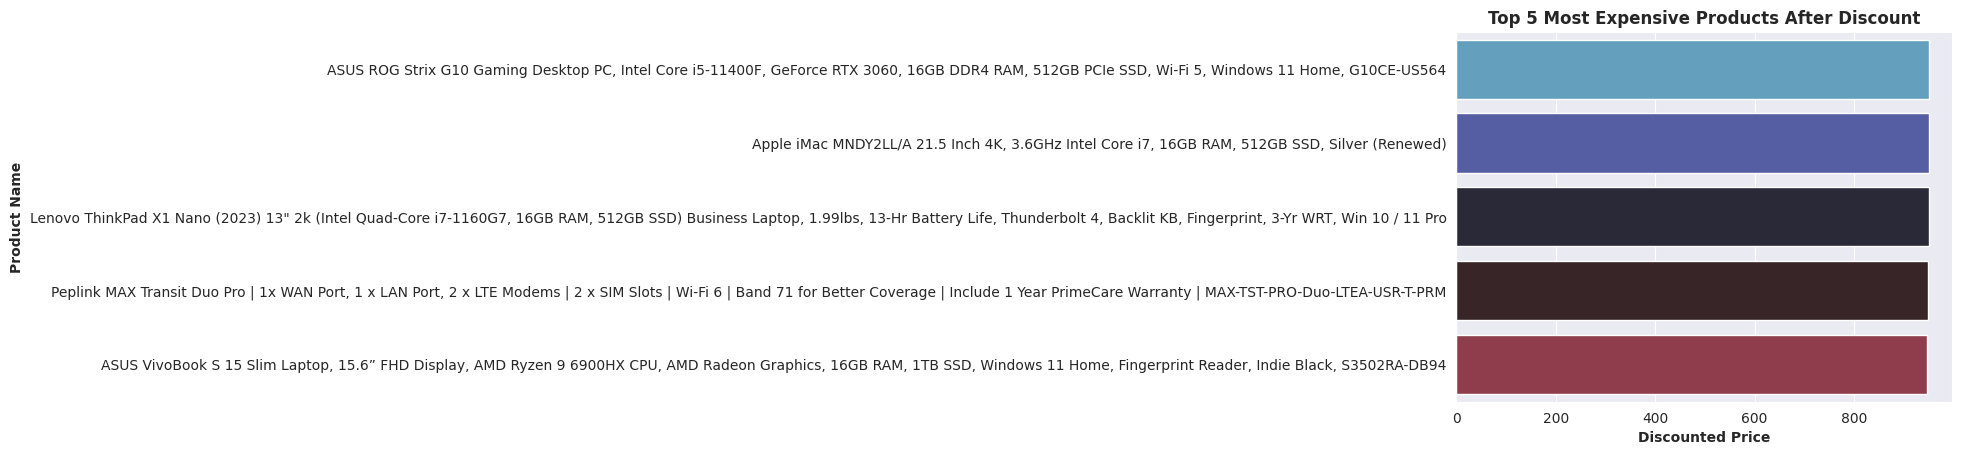

In [24]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df1.sort_values('price', ascending=False).head(5), x='price', y='title')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

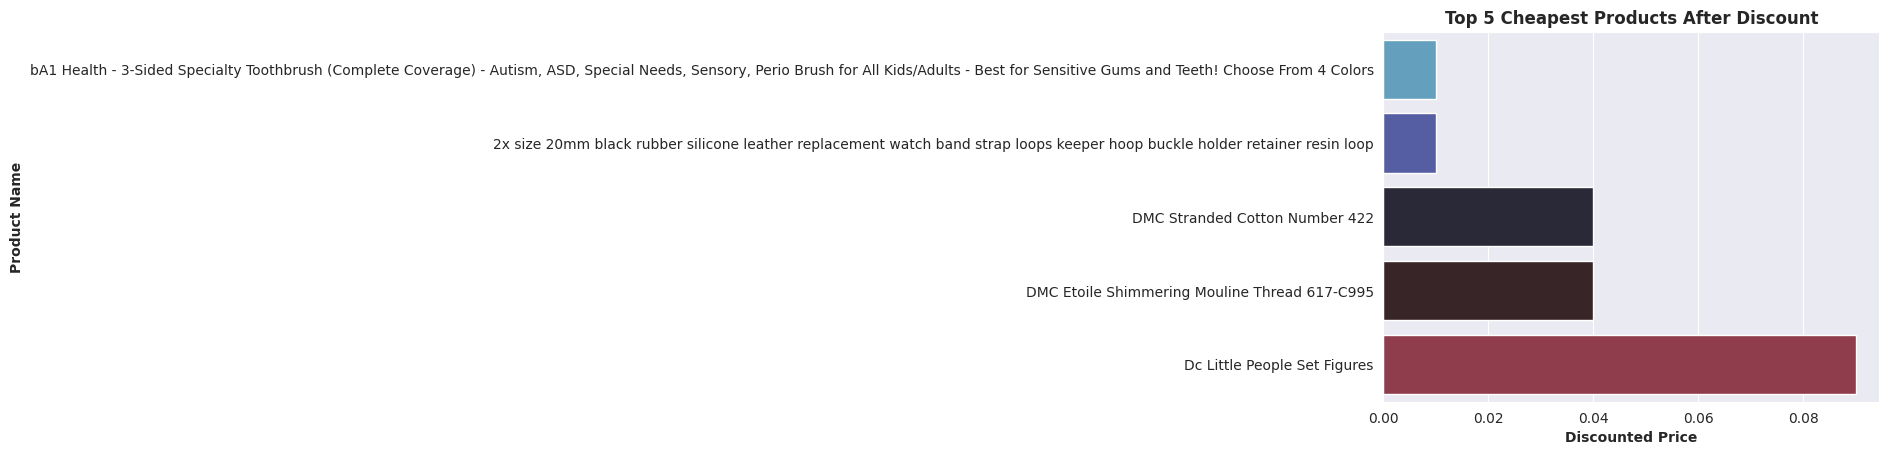

In [25]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df1.sort_values('price').head(5), x='price', y='title')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

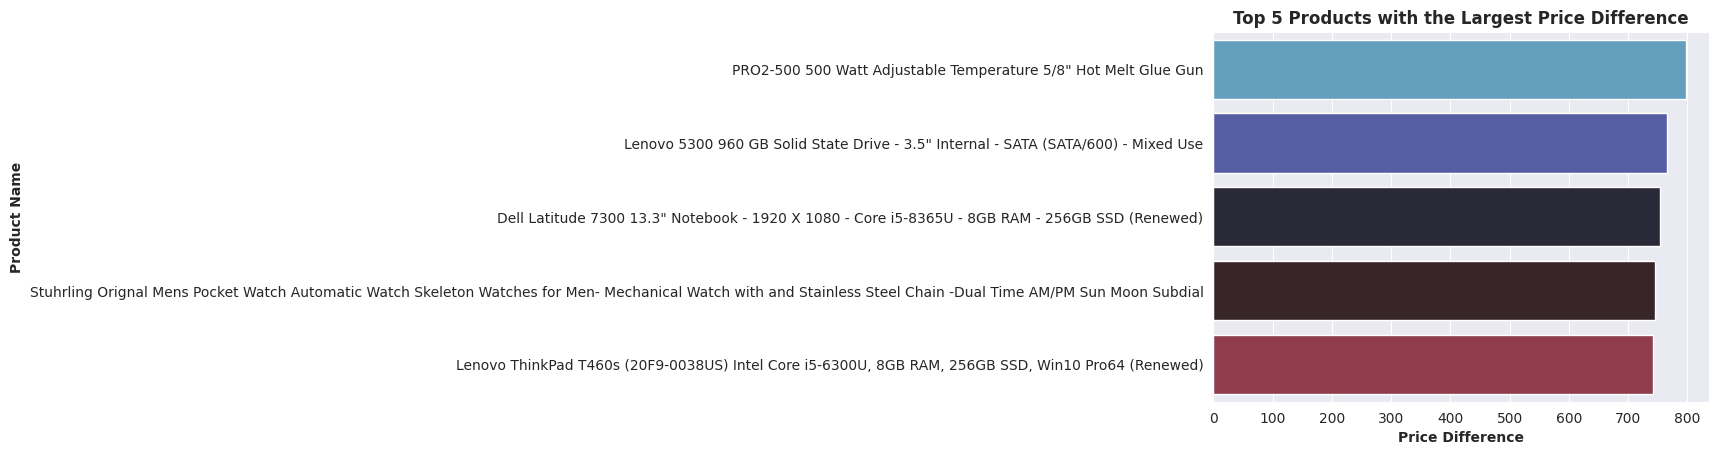

In [26]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='title')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

## Correlation between Features

<ipython-input-27-028b1448c68c>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ax=ax[0], data=df1.corr())


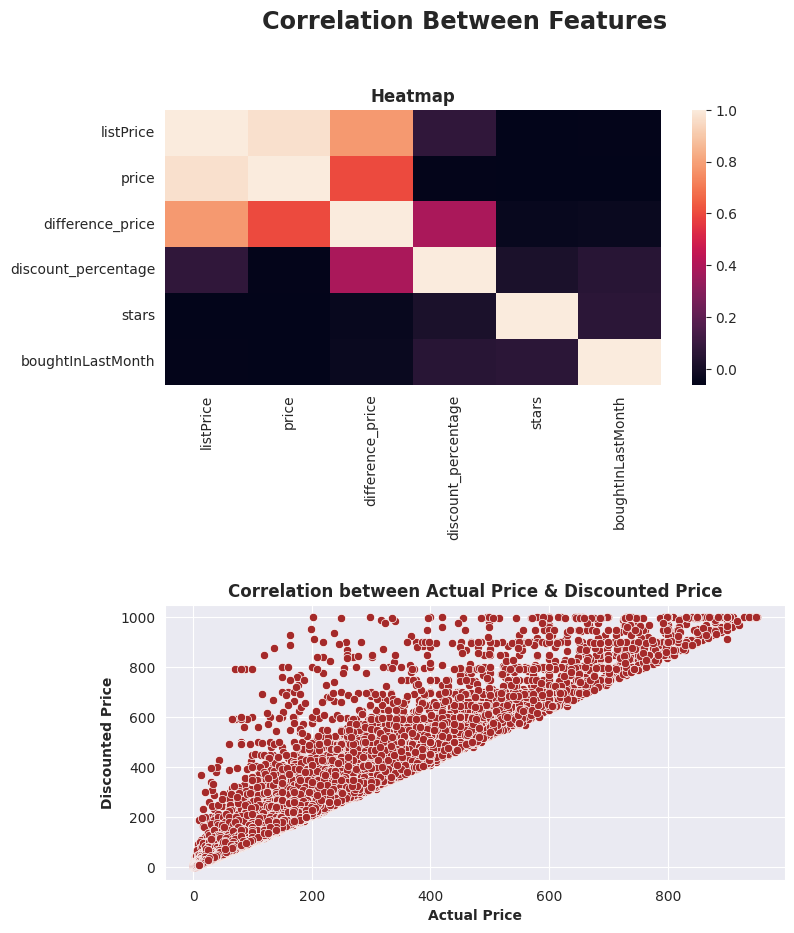

In [27]:
#Heatmap & Correlation between Actual Price & Discounted Price

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=df1.corr())
sns.scatterplot(ax=ax[1], data=df1, y='listPrice', x='price', color='brown')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price', fontweight='bold')
ax[1].set_ylabel('Discounted Price', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

## Product Ratings

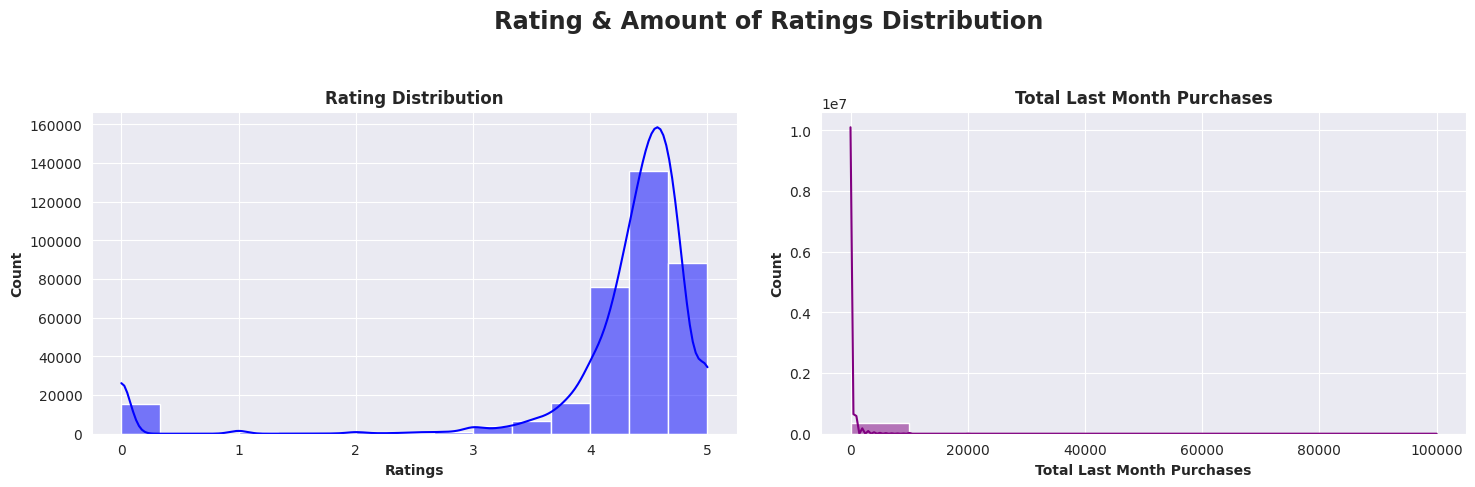

In [28]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='stars', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='boughtInLastMonth', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Ratings', fontweight='bold')
ax[1].set_xlabel('Total Last Month Purchases', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Total Last Month Purchases', fontweight='bold')

plt.show()


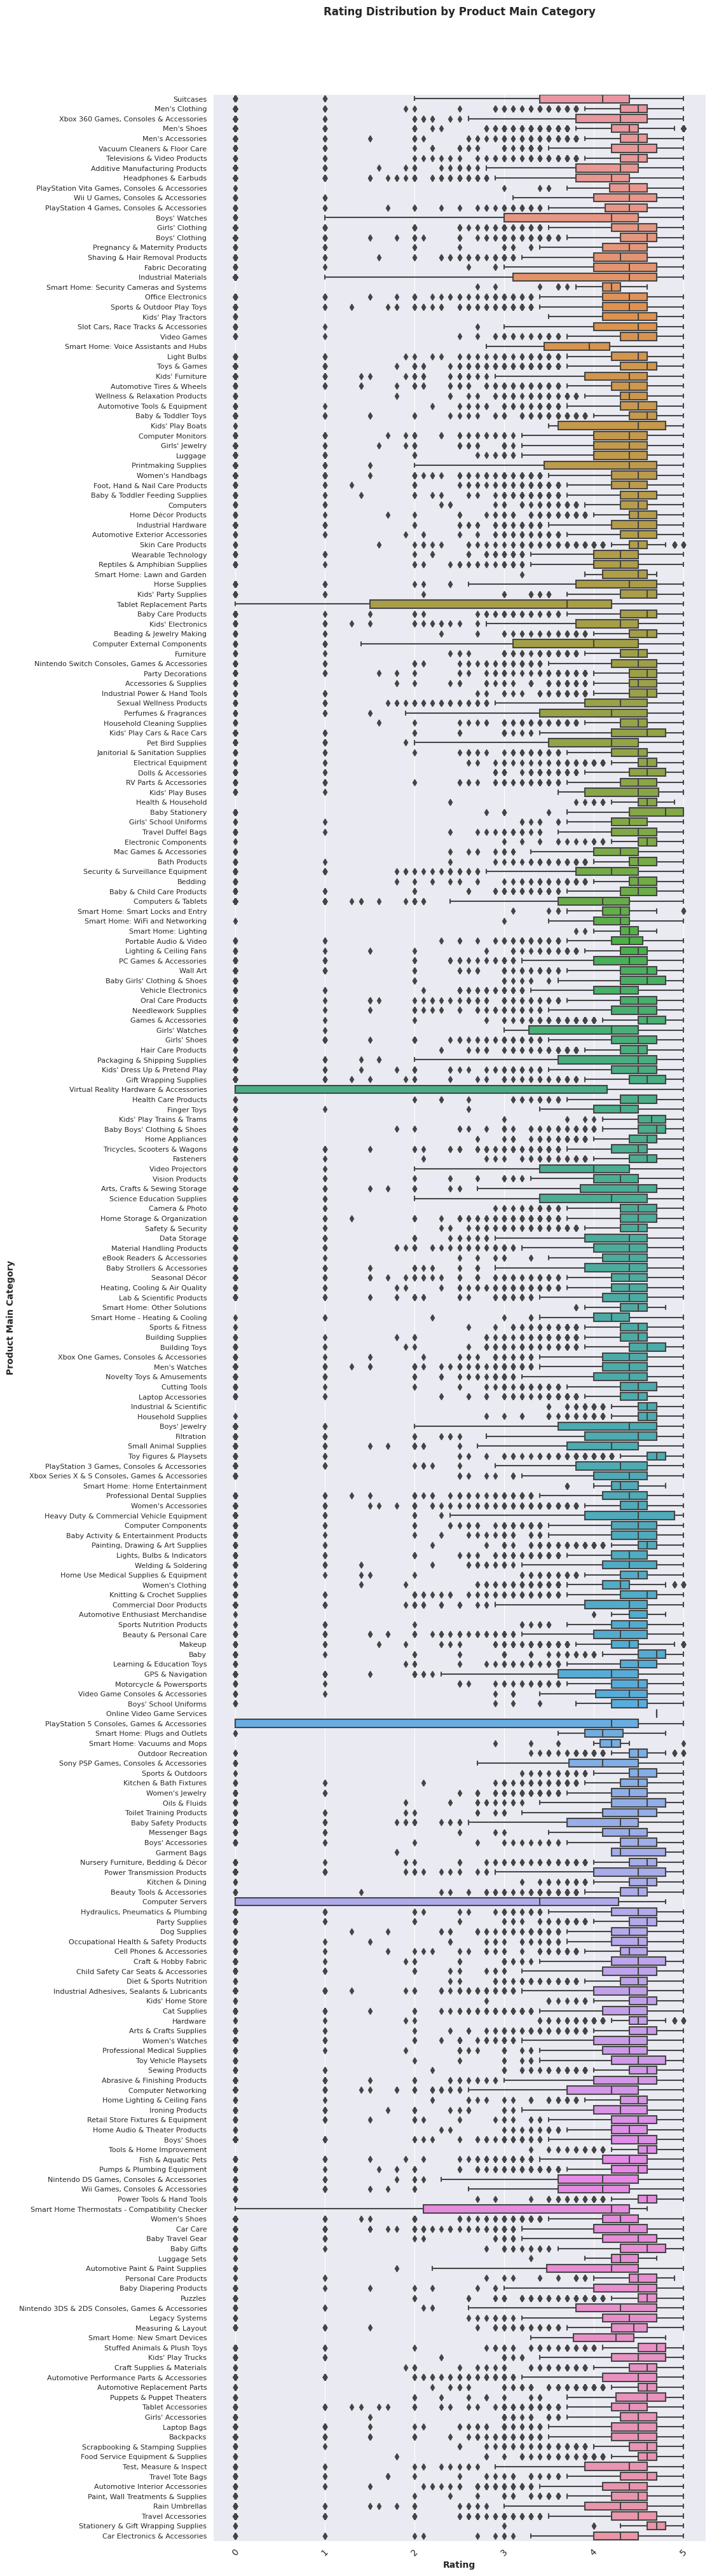

In [29]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 50))  # Increased figure size

sns.boxplot(ax=ax, data=df1, x='stars', y='category_name')

ax.set_xlabel('Rating', fontweight='bold', fontsize=10)  # Adjusted font size
ax.set_ylabel('Product Main Category', fontweight='bold', fontsize=10)  # Adjusted font size
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size=12, y=1.03)  # Adjusted title size

ax.tick_params(axis='y', labelsize=8)  # Adjusted tick label size
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.show()

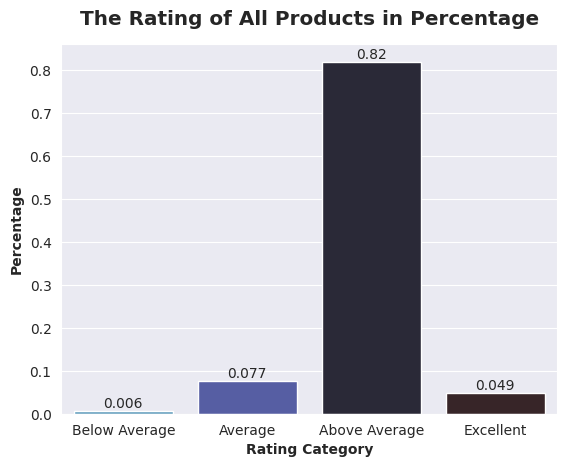

In [30]:
#The Rating of All Products in Percentage

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']

rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

In [31]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['stars', 'boughtInLastMonth'], index=['category_name'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'boughtInLastMonth': 'Total Purchases in Last Month', 'median':'Median', 'mean':'Mean'}, index={'category_name': 'Main Category'})

rating_pivot

p25  \
                                                Total Purchases in Last Month   
category_name                                                                   
Abrasive & Finishing Products                                               0   
Accessories & Supplies                                                      0   
Additive Manufacturing Products                                             0   
Arts & Crafts Supplies                                                      0   
Arts, Crafts & Sewing Storage                                               0   
...                                                                       ...   
Women's Watches                                                             0   
Xbox 360 Games, Consoles & Accessories                                      0   
Xbox One Games, Consoles & Accessories                                      0   
Xbox Series X & S Consoles, Games & Accessories                             0   
eBook Readers & Accessories                                                 0   

                                                       \
                                                stars   
category_name                                           
Abrasive & Finishing Products                    4.00   
Accessories & Supplies                           4.40   
Additive Manufacturing Products                  3.80   
Arts & Crafts Supplies                           4.40   
Arts, Crafts & Sewing Storage                    3.85   
...                                               ...   
Women's Watches                                  4.00   
Xbox 360 Games, Consoles & Accessories           3.80   
Xbox One Games, Consoles & Accessories           4.10   
Xbox Series X & S Consoles, Games & Accessories  4.00   
eBook Readers & Accessories                      4.10   

                                                                       Median  \
                                                Total Purchases in Last Month   
category_name                                                                   
Abrasive & Finishing Products                                               0   
Accessories & Supplies                                                      0   
Additive Manufacturing Products                                             0   
Arts & Crafts Supplies                                                    100   
Arts, Crafts & Sewing Storage                                               0   
...                                                                       ...   
Women's Watches                                                             0   
Xbox 360 Games, Consoles & Accessories                                      0   
Xbox One Games, Consoles & Accessories                                      0   
Xbox Series X & S Consoles, Games & Accessories                             0   
eBook Readers & Accessories                                                 0   

                                                       \
                                                stars   
category_name                                           
Abrasive & Finishing Products                     4.5   
Accessories & Supplies                            4.5   
Additive Manufacturing Products                   4.3   
Arts & Crafts Supplies                            4.6   
Arts, Crafts & Sewing Storage                     4.5   
...                                               ...   
Women's Watches                                   4.4   
Xbox 360 Games, Consoles & Accessories            4.3   
Xbox One Games, Consoles & Accessories            4.4   
Xbox Series X & S Consoles, Games & Accessories   4.4   
eBook Readers & Accessories                       4.4   

                                                                         Mean  \
                                                Total Purchases in Last Month   
category_name                               

## Product Pricing

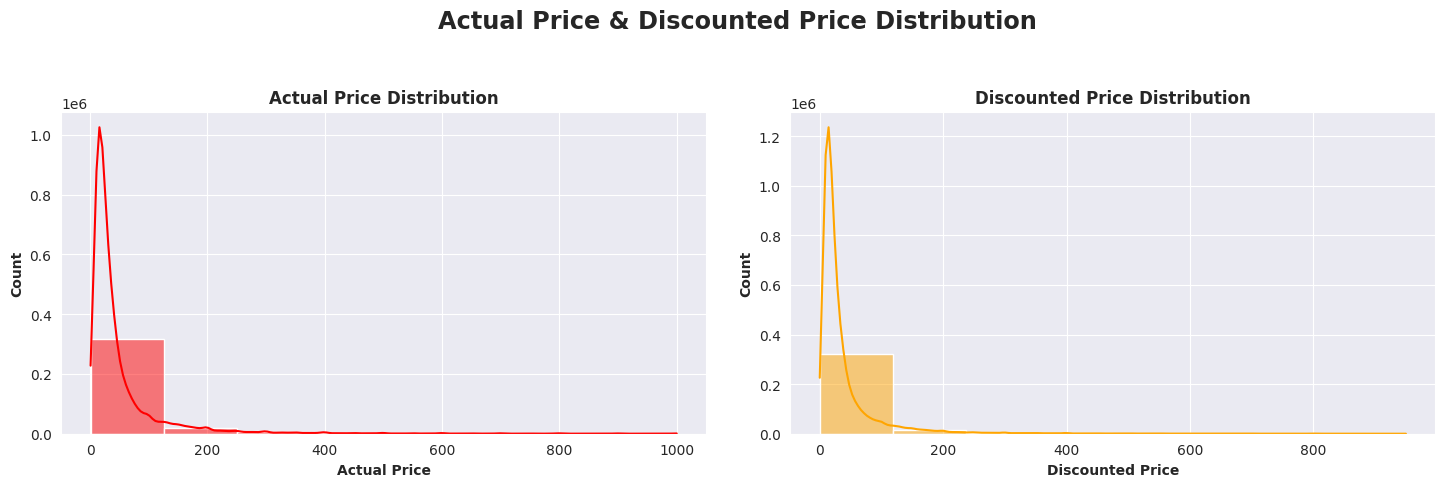

In [32]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='listPrice', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price', fontweight='bold')
ax[1].set_xlabel('Discounted Price', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

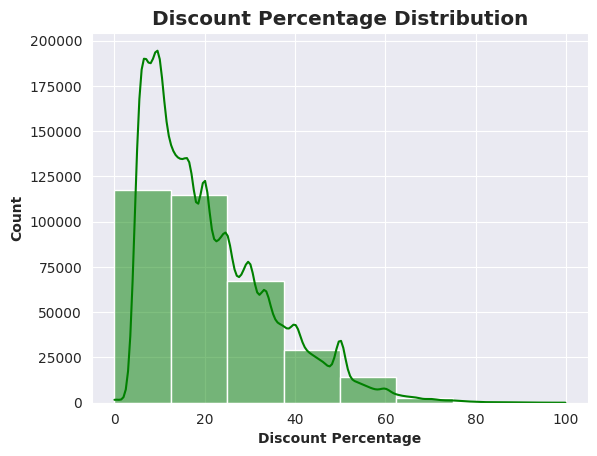

In [33]:
#Discount Percentage Distribution

disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')


disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

In [34]:
#Specific Details about the Discount Percentage

df1['discount_percentage'].describe()

count    345334.000000
mean         20.949847
std          13.703382
min           0.000000
25%          10.005003
50%          17.237946
75%          28.753594
max          99.874844
Name: discount_percentage, dtype: float64

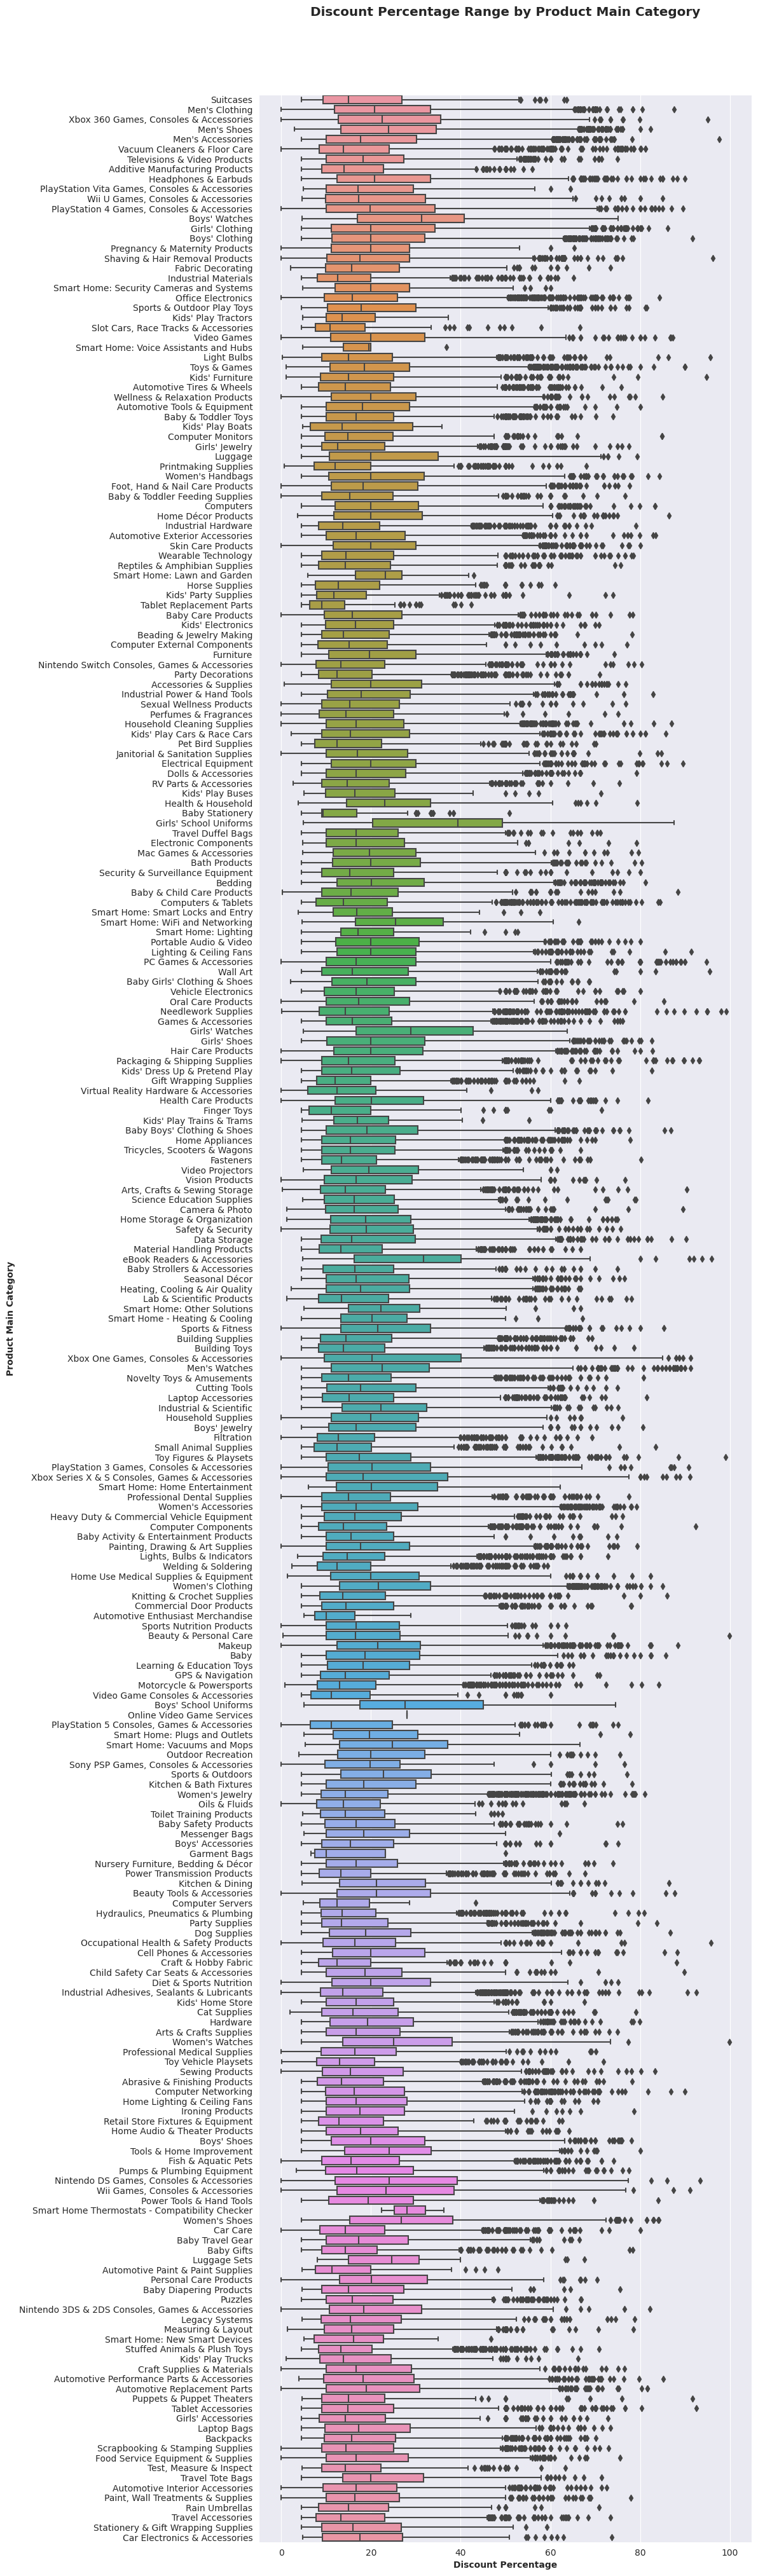

In [35]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 50))

sns.boxplot(data=df1, x='discount_percentage', y='category_name')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()

In [36]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig, ax = plt.subplots(1, 2, figsize=(20, 70))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.boxplot(ax=ax[0], data=df1, y='category_name', x='listPrice', palette="Set2")
sns.boxplot(ax=ax[1], data=df1, y='category_name', x='price', palette="Set3")

ax[0].set_xlabel('Actual Price', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(wspace=0.3)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [37]:
#Pivot table of Prices

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df1.pivot_table(values=['listPrice', 'price'], index=['category_name'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

p25            median  \
                                                listPrice   price listPrice   
category_name                                                                 
Abrasive & Finishing Products                      10.520   8.990    16.990   
Accessories & Supplies                             14.105   9.990    25.240   
Additive Manufacturing Products                    12.590   9.990    22.990   
Arts & Crafts Supplies                              9.990   7.990    14.725   
Arts, Crafts & Sewing Storage                      12.990   9.990    18.290   
...                                                   ...     ...       ...   
Women's Watches                                    35.950  24.990    69.990   
Xbox 360 Games, Consoles & Accessories             19.990  14.990    29.990   
Xbox One Games, Consoles & Accessories             19.990  14.450    29.990   
Xbox Series X & S Consoles, Games & Accessories    29.990  19.990    39.990   
eBook Readers & Accessories                        12.805   8.315    17.990   

                                                               mean  \
                                                  price   listPrice   
category_name                                                         
Abrasive & Finishing Products                    13.950   27.718993   
Accessories & Supplies                           18.990   47.533679   
Additive Manufacturing Products                  18.990   69.464784   
Arts & Crafts Supplies                           10.990   17.966628   
Arts, Crafts & Sewing Storage                    15.450   27.305464   
...                                                 ...         ...   
Women's Watches                                  49.930  135.311199   
Xbox 360 Games, Consoles & Accessories           20.990   36.768437   
Xbox One Games, Consoles & Accessories           19.950   37.008023   
Xbox Series X & S Consoles, Games & Accessories  29.395   60.369679   
eBook Readers & Accessories                      11.990   35.085417   

                                                                 p75            
                                                     price listPrice     price  
category_name                                                                   
Abrasive & Finishing Products                    22.570559   29.9900   24.9900  
Accessories & Supplies                           36.837351   49.9900   39.9900  
Additive Manufacturing Products                  57.471711   39.3000   30.9900  
Arts & Crafts Supplies                           14.201129   20.9900   16.9900  
Arts, Crafts & Sewing Storage                    22.541759   28.9900   22.7450  
...                                                    ...       ...       ...  
Women's Watches                                  92.276267  150.0000  108.2000  
Xbox 360 Games, Consoles & Accessories           27.027375   40.0000   30.8975  
Xbox One Games, Consoles & Accessories           26.746294   39.9900   29.6900  
Xbox Series X & S Consoles, Games & Accessories  46.417385   59.9900   42.0450  
eBook Readers & Accessories                      26.046250   29.9925   20.8850  

[247 rows x 8 columns]

## Predicting Discounted Price of Products

In [38]:
df_small = df1.iloc[ :50000 , :]

In [39]:
df_small

,asin,title,category_name,listPrice,price,difference_price,discount_percentage,stars,rating_score,boughtInLastMonth
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,Suitcases,209.99,169.99,40.00,19.048526,4.5,Above Average,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,Suitcases,429.99,365.49,64.50,15.000349,4.6,Above Average,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,Suitcases,354.37,291.59,62.78,17.715947,4.6,Above Average,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,Suitcases,309.99,174.99,135.00,43.549792,4.5,Above Average,400
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,Suitcases,137.04,112.63,24.41,17.812318,4.5,Above Average,500
...,...,...,...,...,...,...,...,...,...,...
196615,B08CY14VGD,Cipon Wireless Adapter Compatible with Xbox On...,Video Games,18.99,17.99,1.00,5.265929,4.3,Above Average,0
196618,B08LNFPZLB,YSCP Typewriter Style Mechanical Gaming Keyboa...,Video Games,59.99,39.99,20.00,33.338890,4.6,Above Average,0
196620,B0911WLYVN,Xbox Series X 1TB Black (Renewed),Video Games,489.99,454.99,35.00,7.143003,4.4,Above Average,100
196622,B0B98TXTGY,PowerA Enhanced Wired Controller for Xbox Seri...,Video Games,37.99,29.91,8.08,21.268755,4.2,Above Average,600


In [40]:
df_small.dtypes

asin                     object
title                    object
category_name            object
listPrice               float64
price                   float64
difference_price        float64
discount_percentage     float64
stars                   float64
rating_score           category
boughtInLastMonth         int64
dtype: object

# Converting all the title into lower case

In [41]:
df_small["title"] = df_small["title"].apply(lambda x : x.lower())

<ipython-input-41-c502f1182ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["title"] = df_small["title"].apply(lambda x : x.lower())


# Train and Test Split

In [42]:
from sklearn.model_selection import train_test_split

x = df_small.drop(["price" , "asin"] , axis=1)
y = df_small["price"]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 ,  random_state=42)

## Count Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=8000)

X_train_vector = vectorizer.fit_transform(x_train["title"])

X_test_vector = vectorizer.transform(x_test["title"])

# TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer


vectorizer_tfidf = TfidfVectorizer(min_df=10 , max_features=8000)
vectorizer_tfidf.fit(x_train["title"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf = vectorizer_tfidf.transform(x_train["title"].values)
X_test_tfidf = vectorizer_tfidf.transform(x_test["title"].values)

normalizer = Normalizer()

selected_col = [i for i in x_train.columns if x_train[i].dtype !='object' and x_train[i].dtype !='category']
normalizer.fit(x_train[selected_col])

x_train_norm = normalizer.transform(x_train[selected_col])
x_test_norm = normalizer.transform(x_test[selected_col] )

In [45]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder  =OneHotEncoder()

columns = ['category_name', 'rating_score']

onehot_encoder.fit(x_train[columns])

x_train_categorical = onehot_encoder.transform(x_train[columns])
x_test_categorical = onehot_encoder.transform(x_test[columns] )

In [46]:
from scipy.sparse import hstack
X_tr = hstack((X_train_vector, x_train_norm , x_train_categorical)).tocsr()
X_test = hstack((X_test_vector, x_test_norm , x_test_categorical)).tocsr()

In [47]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_tfidf, x_train_norm , x_train_categorical)).tocsr()
X_test_tfidf = hstack((X_test_tfidf, x_test_norm , x_test_categorical)).tocsr()

# Ridge Regression

## Using TFIDF

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_tr_tfidf, X_test_tfidf, y_train, and y_test are already defined

# Optional: Scale the features
scaler_X = StandardScaler()
X_tr_tfidf_scaled = scaler_X.fit_transform(X_tr_tfidf.toarray())
X_test_tfidf_scaled = scaler_X.transform(X_test_tfidf.toarray())

# Define the Ridge regression model
ridge = Ridge()

# Define a dictionary of hyperparameters to search
# Note: For Ridge regression, the main hyperparameter to tune is 'alpha'
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Setup the grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_tr_tfidf_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_ridge = grid_search.best_estimator_
predicted_train = best_ridge.predict(X_tr_tfidf_scaled)
predicted_test = best_ridge.predict(X_test_tfidf_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, predicted_train)
test_mse = mean_squared_error(y_test, predicted_test)
train_r2 = r2_score(y_train, predicted_train)
test_r2 = r2_score(y_test, predicted_test)

print(f"Train MSE for Ridge Regression using TFIDF: {train_mse}, R2 for Ridge Regression using TFIDF: {train_r2}")
print(f"Test MSE for Ridge Regression using TFIDF: {test_mse}, R2 for Ridge Regression using TFIDF: {test_r2}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'alpha': 100}
Best Score: 0.5311217450049736
Train MSE for Ridge Regression using TFIDF: 1021.2138352341356, R2 for Ridge Regression using TFIDF: 0.7099551761350309
Test MSE for Ridge Regression using TFIDF: 1486.4633611316967, R2 for Ridge Regression using TFIDF: 0.5740924368004406


## Using Count Vector

In [49]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_tr, X_test, y_train, and y_test are already defined

# Optional: Scale the features
scaler_X = StandardScaler()
X_tr_scaled = scaler_X.fit_transform(X_tr.toarray())
X_test_scaled = scaler_X.transform(X_test.toarray())

# Define the Ridge regression model with the best alpha value
best_alpha = 100
ridge_model = Ridge(alpha=best_alpha)

# Train the model on the training data
ridge_model.fit(X_tr_scaled, y_train)

# Make predictions on the training and test data
predicted_train = ridge_model.predict(X_tr_scaled)
predicted_test = ridge_model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, predicted_train)
test_mse = mean_squared_error(y_test, predicted_test)
train_r2 = r2_score(y_train, predicted_train)
test_r2 = r2_score(y_test, predicted_test)

print(f"Train MSE for Ridge Regression using Count Vector: {train_mse}, R2 for Ridge Regression using Count Vector: {train_r2}")
print(f"Test MSE for Ridge Regression using Count Vector: {test_mse}, R2 for Ridge Regression using Count Vector: {test_r2}")


Train MSE for Ridge Regression using Count Vector: 754.0022420665176, R2 for Ridge Regression using Count Vector: 0.7858485265783396
Test MSE for Ridge Regression using Count Vector: 1854.5924316339165, R2 for Ridge Regression using Count Vector: 0.4686145895421333


# Random forest Regressor

## Using Count Vector

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming X_tr, X_test, y_train, and y_test are already defined

# Create and train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_tr.toarray(), y_train)

# Predict on the training data
predicted_train = model.predict(X_tr.toarray())
# Predict on the test data
predicted_test = model.predict(X_test.toarray())

# Correct way to calculate R2
train_mse = mean_squared_error(y_train, predicted_train)
test_mse = mean_squared_error(y_test, predicted_test)
train_r2 = r2_score(y_train, predicted_train)
test_r2 = r2_score(y_test, predicted_test)

print(f"Train MSE for Random Forest Regressor using Count Vector: {train_mse}, R2 for Random Forest Regressor using Count Vector: {train_r2}")
print(f"Test MSE for Random Forest Regressor using Count Vector: {test_mse}, R2 for Random Forest Regressor using Count Vector: {test_r2}")


Train MSE for Random Forest Regressor using Count Vector: 8.131769161925952, R2 for Random Forest Regressor using Count Vector: 0.9976904175473292
Test MSE for Random Forest Regressor using Count Vector: 67.88477691912848, R2 for Random Forest Regressor using Count Vector: 0.9805493760075192


## Using TFIDF

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming X_tr_tfidf, X_test_tfidf, y_train, and y_test are already defined

# Create and train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_tr_tfidf.toarray(), y_train)

# Predict on the training data
predicted_train = model.predict(X_tr_tfidf.toarray())  # Ensure consistency in feature set

# Correct way to calculate R2
train_r2 = r2_score(y_train, predicted_train)
train_mse = mean_squared_error(y_train, predicted_train)

# Predict on the test data
predicted_test = model.predict(X_test_tfidf.toarray())  # Use the correct test data

# Correct way to calculate R2 for test data
test_r2 = r2_score(y_test, predicted_test)
test_mse = mean_squared_error(y_test, predicted_test)

print(f"Train MSE for Random Forest Regressor using TFIDF: {train_mse}, R2 for Random Forest Regressor using TFIDF: {train_r2}")
print(f"Test MSE for Random Forest Regressor using Count TFIDF: {test_mse}, R2 for Random Forest Regressor using TFIDF: {test_r2}")


Train MSE for Random Forest Regressor using TFIDF: 8.095537805788936, R2 for Random Forest Regressor using TFIDF: 0.9977007079654048
Test MSE for Random Forest Regressor using Count TFIDF: 73.35238157941089, R2 for Random Forest Regressor using TFIDF: 0.9789827755528492


## Predicting Sentiment of Products

In [52]:
df_small

,asin,title,category_name,listPrice,price,difference_price,discount_percentage,stars,rating_score,boughtInLastMonth
1,B07GDLCQXV,luggage sets expandable pc+abs durable suitcas...,Suitcases,209.99,169.99,40.00,19.048526,4.5,Above Average,1000
2,B07XSCCZYG,platinum elite softside expandable checked lug...,Suitcases,429.99,365.49,64.50,15.000349,4.6,Above Average,300
3,B08MVFKGJM,freeform hardside expandable with double spinn...,Suitcases,354.37,291.59,62.78,17.715947,4.6,Above Average,400
4,B01DJLKZBA,winfield 2 hardside expandable luggage with sp...,Suitcases,309.99,174.99,135.00,43.549792,4.5,Above Average,400
8,B08BXBCNMQ,omni 2 hardside expandable luggage with spinne...,Suitcases,137.04,112.63,24.41,17.812318,4.5,Above Average,500
...,...,...,...,...,...,...,...,...,...,...
196615,B08CY14VGD,cipon wireless adapter compatible with xbox on...,Video Games,18.99,17.99,1.00,5.265929,4.3,Above Average,0
196618,B08LNFPZLB,yscp typewriter style mechanical gaming keyboa...,Video Games,59.99,39.99,20.00,33.338890,4.6,Above Average,0
196620,B0911WLYVN,xbox series x 1tb black (renewed),Video Games,489.99,454.99,35.00,7.143003,4.4,Above Average,100
196622,B0B98TXTGY,powera enhanced wired controller for xbox seri...,Video Games,37.99,29.91,8.08,21.268755,4.2,Above Average,600


# Train and Test Split

In [53]:
from sklearn.model_selection import train_test_split

x1 = df_small.drop(["rating_score" , "asin"] , axis=1)
y1 = df_small["rating_score"]

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1 , y1 , test_size=0.33 ,  random_state=42)

## Count Vectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=8000)

X_train_vector1 = vectorizer.fit_transform(x_train["title"])

X_train_vector1.toarray()

X_test_vector1 = vectorizer.transform(x_test["title"])

# TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer_tfidf1 = TfidfVectorizer(min_df=10 , max_features=8000)
vectorizer_tfidf1.fit(x_train["title"].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf1 = vectorizer_tfidf1.transform(x_train["title"].values)
X_test_tfidf1 = vectorizer_tfidf1.transform(x_test["title"].values)

In [56]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

selected_col = [i for i in x_train.columns if x_train[i].dtype !='object' and x_train[i].dtype !='category']
normalizer.fit(x_train[selected_col])

x_train_norm1 = normalizer.transform(x_train1[selected_col])
x_test_norm1 = normalizer.transform(x_test1[selected_col] )

In [57]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder  =OneHotEncoder()

columns = ['category_name']

onehot_encoder.fit(x_train1[columns])

x_train_categorical1 = onehot_encoder.transform(x_train1[columns])
x_test_categorical1 = onehot_encoder.transform(x_test1[columns] )

In [58]:
from scipy.sparse import hstack
X_tr1 = hstack((X_train_vector1, x_train_norm1 , x_train_categorical1)).tocsr()
X_test1 = hstack((X_test_vector1, x_test_norm1 , x_test_categorical1)).tocsr()

In [59]:
from scipy.sparse import hstack
X_tr_tfidf1 = hstack((X_train_tfidf1, x_train_norm1 , x_train_categorical1)).tocsr()
X_test_tfidf1 = hstack((X_test_tfidf1, x_test_norm1 , x_test_categorical1)).tocsr()

# Multinomial Naive Bayes

In [60]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

encoding_model = LabelEncoder()

y_train_encoded = encoding_model.fit_transform(y_train1)

y_test_encoded = encoding_model.transform(y_test1)

## Using Count Vector

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Assuming X_tr1, X_test1, y_train_encoded, and y_test_encoded are already defined

# Create and train the Multinomial Naive Bayes model
NB = MultinomialNB()
NB.fit(X_tr1, y_train_encoded)

# Use predict to get the class labels
y_train_pred = NB.predict(X_tr1)
y_test_pred = NB.predict(X_test1)

# Generate classification reports
train_classification_report = classification_report(y_train_encoded, y_train_pred)
test_classification_report = classification_report(y_test_encoded, y_test_pred)

print("Classification Report for Training Data:\n", train_classification_report)
print("Classification Report for Test Data:\n", test_classification_report)

# Binarize the output classes for ROC AUC calculation
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Use predict_proba to get probabilities
y_train_prob = NB.predict_proba(X_tr1)
y_test_prob = NB.predict_proba(X_test1)

# Calculate ROC AUC score for each class and average
train_roc_auc = roc_auc_score(y_train_binarized, y_train_prob, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test_binarized, y_test_prob, multi_class='ovr')

print("Average ROC value for y_train:", train_roc_auc)
print("Average ROC value for y_test:", test_roc_auc)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83     26258
           1       0.29      0.45      0.35      2866
           2       0.22      0.07      0.11       217
           3       0.31      0.31      0.31      1945
           4       0.36      0.58      0.44      2214

    accuracy                           0.71     33500
   macro avg       0.41      0.44      0.41     33500
weighted avg       0.76      0.71      0.73     33500

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82     13047
           1       0.23      0.35      0.28      1390
           2       0.00      0.00      0.00       100
           3       0.16      0.15      0.15       928
           4       0.28      0.46      0.35      1035

    accuracy                           0.69     16500
   macro avg       0.31      0.35      0.32     165

# Using TF-IDF

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Assuming X_tr_tfidf1, X_test_tfidf1, y_train_encoded, and y_test_encoded are already defined

# Create and train the Multinomial Naive Bayes model
NB = MultinomialNB()
NB.fit(X_tr_tfidf1, y_train_encoded)

# Use predict to get the class labels
y_train_pred = NB.predict(X_tr_tfidf1)
y_test_pred = NB.predict(X_test_tfidf1)

# Generate classification reports
train_classification_report = classification_report(y_train_encoded, y_train_pred)
test_classification_report = classification_report(y_test_encoded, y_test_pred)

print("Classification Report for Training Data:\n", train_classification_report)
print("Classification Report for Test Data:\n", test_classification_report)

# Binarize the output classes for ROC AUC calculation
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Use predict_proba to get probabilities
y_train_prob = NB.predict_proba(X_tr_tfidf1)
y_test_prob = NB.predict_proba(X_test_tfidf1)

# Calculate ROC AUC score for each class and average
train_roc_auc = roc_auc_score(y_train_binarized, y_train_prob, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test_binarized, y_test_prob, multi_class='ovr')

print("Average ROC value for y_train:", train_roc_auc)
print("Average ROC value for y_test:", test_roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88     26258
           1       0.31      0.21      0.25      2866
           2       0.00      0.00      0.00       217
           3       0.39      0.08      0.13      1945
           4       0.57      0.24      0.34      2214

    accuracy                           0.78     33500
   macro avg       0.42      0.29      0.32     33500
weighted avg       0.73      0.78      0.74     33500

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88     13047
           1       0.27      0.17      0.21      1390
           2       0.00      0.00      0.00       100
           3       0.24      0.05      0.08       928
           4       0.53      0.18      0.27      1035

    accuracy                           0.78     16500
   macro avg       0.37      0.27      0.29     165

# Logistic Regression

## Using Count Vector

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Assuming X_tr1, X_test1, y_train_encoded, and y_test_encoded are already defined

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_tr1, y_train_encoded)

# Use predict to get the class labels
y_train_pred = model.predict(X_tr1)
y_test_pred = model.predict(X_test1)

# Generate classification reports
train_classification_report = classification_report(y_train_encoded, y_train_pred)
test_classification_report = classification_report(y_test_encoded, y_test_pred)

print("Classification Report for Training Data:\n", train_classification_report)
print("Classification Report for Test Data:\n", test_classification_report)

# Binarize the output classes for ROC AUC calculation
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Use predict_proba to get probabilities
y_train_prob = model.predict_proba(X_tr1)
y_test_prob = model.predict_proba(X_test1)

# Calculate ROC AUC score for each class and average
train_roc_auc = roc_auc_score(y_train_binarized, y_train_prob, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test_binarized, y_test_prob, multi_class='ovr')

print("Average ROC value for y_train:", train_roc_auc)
print("Average ROC value for y_test:", test_roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     26258
           1       0.86      0.40      0.55      2866
           2       0.97      0.51      0.67       217
           3       0.88      0.33      0.48      1945
           4       0.98      0.89      0.93      2214

    accuracy                           0.89     33500
   macro avg       0.91      0.62      0.71     33500
weighted avg       0.89      0.89      0.87     33500

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     13047
           1       0.34      0.16      0.22      1390
           2       0.18      0.03      0.05       100
           3       0.30      0.10      0.15       928
           4       0.91      0.72      0.81      1035

    accuracy                           0.82     16500
   macro avg       0.52      0.40      0.43     165

# Using TFIDF

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Assuming X_tr_tfidf1, X_test_tfidf1, y_train_encoded, and y_test_encoded are already defined

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_tr_tfidf1, y_train_encoded)

# Use predict to get the class labels
y_train_pred = model.predict(X_tr_tfidf1)
y_test_pred = model.predict(X_test_tfidf1)

# Generate classification reports
train_classification_report = classification_report(y_train_encoded, y_train_pred)
test_classification_report = classification_report(y_test_encoded, y_test_pred)

print("Classification Report for Training Data:\n", train_classification_report)
print("Classification Report for Test Data:\n", test_classification_report)

# Binarize the output classes for ROC AUC calculation
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Use predict_proba to get probabilities
y_train_prob = model.predict_proba(X_tr_tfidf1)
y_test_prob = model.predict_proba(X_test_tfidf1)

# Calculate ROC AUC score for each class and average
train_roc_auc = roc_auc_score(y_train_binarized, y_train_prob, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test_binarized, y_test_prob, multi_class='ovr')

print("Average ROC value for y_train:", train_roc_auc)
print("Average ROC value for y_test:", test_roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     26258
           1       0.66      0.11      0.19      2866
           2       0.00      0.00      0.00       217
           3       0.73      0.08      0.15      1945
           4       0.98      0.84      0.91      2214

    accuracy                           0.85     33500
   macro avg       0.64      0.41      0.43     33500
weighted avg       0.83      0.85      0.80     33500

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     13047
           1       0.46      0.08      0.13      1390
           2       0.00      0.00      0.00       100
           3       0.41      0.04      0.07       928
           4       0.97      0.78      0.86      1035

    accuracy                           0.84     16500
   macro avg       0.54      0.38      0.40     165